In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')

In [2]:
import os
print(os.listdir('C:/Users/Aakash/Desktop/input/'))

[]


In [3]:
#Importing dataset
data=pd.read_csv('C:/Users\\Aakash\\Desktop\\creditcard.csv')
df=pd.DataFrame(data)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#checking for missing values
df.isnull().sum().max()

0

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
#All the columns have same number of values and are of the same type except Class which is int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

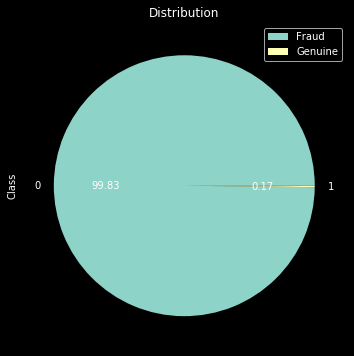

In [7]:
#Comparing the distribution of the 2 classes, we can see heavy imbalance
df['Class'].value_counts(normalize='true')
df['Class'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%.2f')
plt.title('Distribution')
plt.legend(["Fraud","Genuine"])

In [8]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


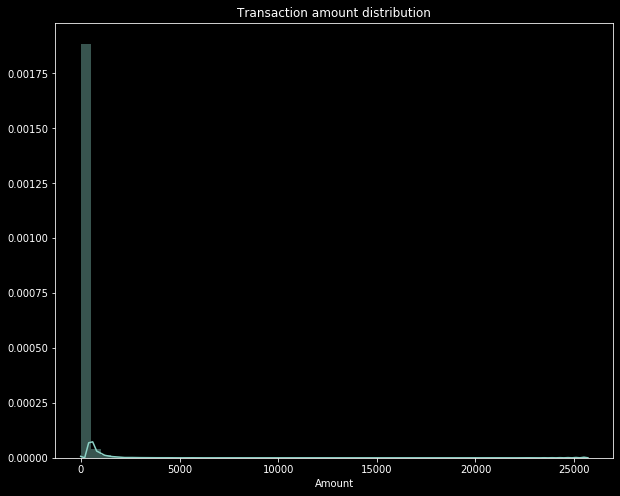

In [9]:
#most of the transactions are between 0-3000
plt.figure(figsize=(10,8))
plt.title("Transaction amount distribution")
sns.distplot(df['Amount'])

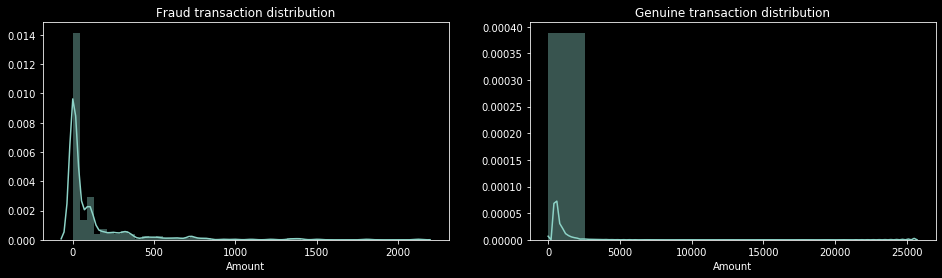

In [10]:
#fraud transactions have high number of 0 value transaction
fig,axs=plt.subplots(ncols=2,figsize=(16,4))

sns.distplot(df[df['Class']==1]['Amount'],ax=axs[0])
axs[0].set_title("Fraud transaction distribution")

sns.distplot(df[df['Class']==0]['Amount'],ax=axs[1], bins=10)
axs[1].set_title("Genuine transaction distribution")

plt.show()


In [11]:
#Distrubution of fraud transactions according to amount
print('Fraud Transaction distribution:\n',
df[df['Class']==1]['Amount'].value_counts().head(10))
print('\n')
print('Max:',df[df['Class']==1]['Amount'].max(),'\n Min:',df[df['Class']==1]['Amount'].min())

Fraud Transaction distribution:
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
1.10       3
2.28       3
Name: Amount, dtype: int64


Max: 2125.87 
 Min: 0.0


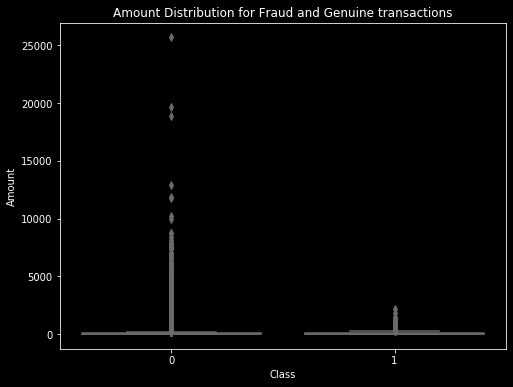

In [12]:
#Boxplot for transactions
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

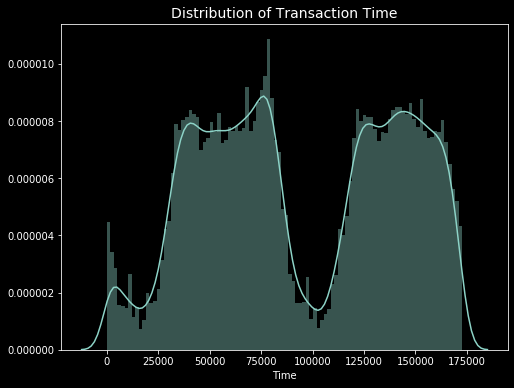

In [13]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['Time'], bins=100)
plt.show()

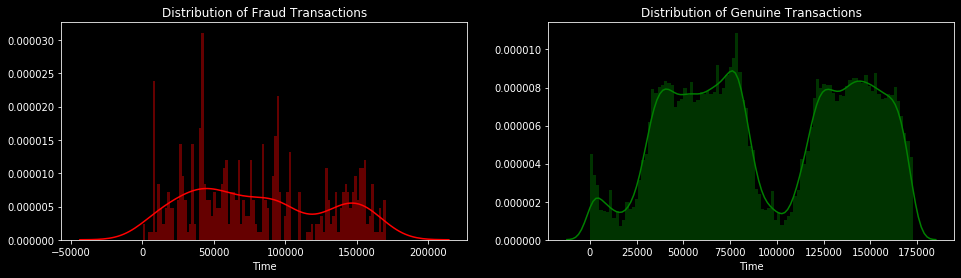

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

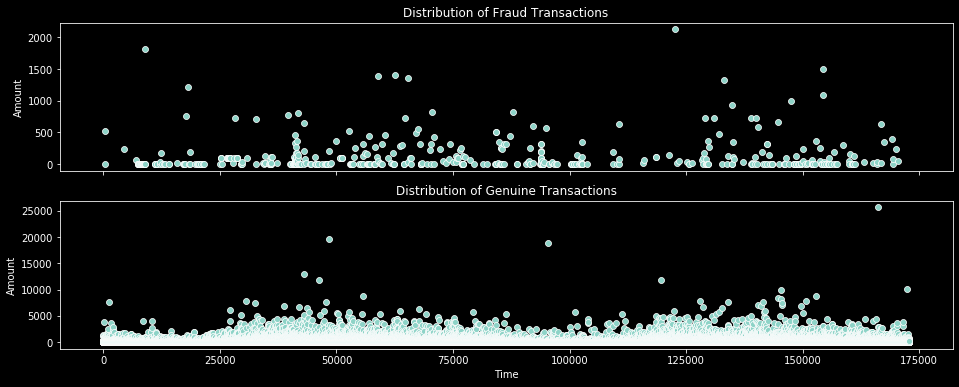

In [15]:
fig, axs = plt.subplots(2,1,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")



plt.show()

In [16]:
#Removal of ouliers, only extreme ones

Q3 = np.percentile(df['Amount'], 75)
Q1=np.percentile(df['Amount'],25)

cutoff=5

#Interquartile range
IQR=Q3-Q1

L=Q1-(IQR*cutoff)
U=Q3+(IQR*cutoff)
print(L)

print(U)

outliers_all=df[(df['Amount']<L)|(df['Amount']>U)]['Amount']
outliers_fraud=df[(df['Class']==1)&((df['Amount']<L)|(df['Amount']>U))]['Amount']

outliers_gen=df[(df['Class']==0)&((df['Amount']<L)|(df['Amount']>U))]['Amount']

print("Total Outliers:",outliers_all.count())
print("Fraud Outliers:",outliers_fraud.count())
print("Genuine Outliers:",outliers_gen.count())

-352.22499999999997
434.99
Total Outliers: 11366
Fraud Outliers: 41
Genuine Outliers: 11325


In [17]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
df.shape

(284807, 31)

In [19]:
#removal of outliers
df=df.drop(outliers_all.index)

In [20]:
df.shape

(273441, 31)

In [21]:
#resetting index after removal of outliers
df.reset_index(inplace = True , drop = True)

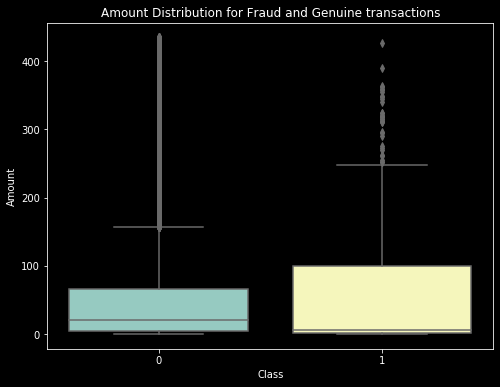

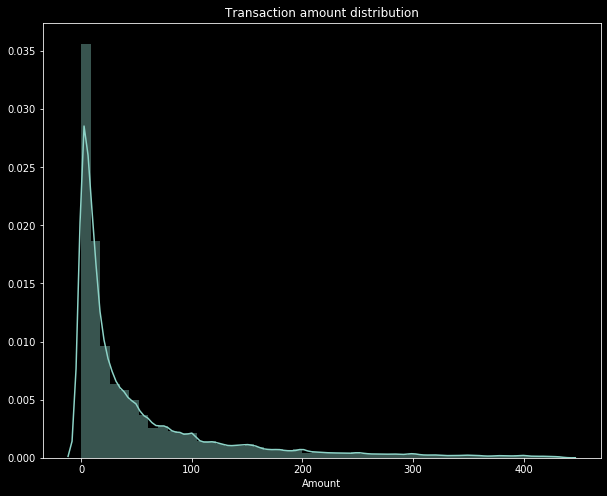

In [22]:
# boxplot

plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

plt.figure(figsize=(10,8))
plt.title("Transaction amount distribution")
sns.distplot(df['Amount'])

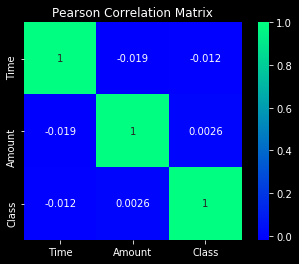

In [23]:
#checking correlation between features, if any. Low correlation.
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['Time', 'Amount','Class']].corr(),square=True,cmap="winter",
            linecolor='w',annot=True);

In [24]:
df.shape

(273441, 31)

In [25]:
df['Class'].value_counts(normalize='True')

0    0.998351
1    0.001649
Name: Class, dtype: float64

In [26]:
#Converting time into Day, hours only for visualisation purposes

In [27]:
df['Time']=df['Time'].apply(lambda sec:(sec/3600))

In [28]:
import math
df['Hour']=df['Time']%24
df['Hour']=df['Hour'].apply(lambda x: math.floor(x))

df['Day'] = df['Time']/24   
df['Day'] = df['Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [29]:
df[['Time','Amount','Day','Hour','Class']]

,Time,Amount,Day,Hour,Class
0,0.000000,149.62,1,0,0
1,0.000000,2.69,1,0,0
2,0.000278,378.66,1,0,0
3,0.000278,123.50,1,0,0
4,0.000556,69.99,1,0,0
...,...,...,...,...,...
273436,47.996111,0.77,2,23,0
273437,47.996389,24.79,2,23,0
273438,47.996667,67.88,2,23,0
273439,47.996667,10.00,2,23,0


In [30]:
fraud_daywise=df[df['Class']==1]['Day'].value_counts()
gen_daywise=df[df['Class']==0]['Day'].value_counts()
total_daywise=df['Day'].value_counts()

print('Total transaction day wise:',total_daywise)
print('\n')
print('Fraud day wise',fraud_daywise)
print('\n')
print('Genuine day wise', gen_daywise)

Total transaction day wise: 1    138809
2    134632
Name: Day, dtype: int64


Fraud day wise 1    259
2    192
Name: Day, dtype: int64


Genuine day wise 1    138550
2    134440
Name: Day, dtype: int64


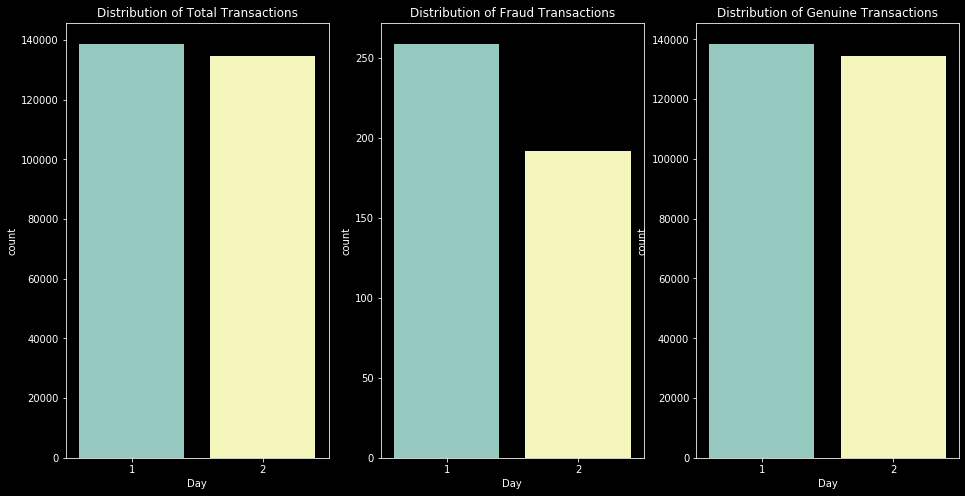

In [31]:
fig,axs=plt.subplots(ncols=3,figsize=(16,8))

sns.countplot(df['Day'], ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")

sns.countplot(df[(df['Class'] == 1)]['Day'], ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.countplot(df[(df['Class'] == 0)]['Day'], ax=axs[2])
axs[2].set_title("Distribution of Genuine Transactions")

plt.show()


Text(0.5, 0.98, 'Time v frequency')

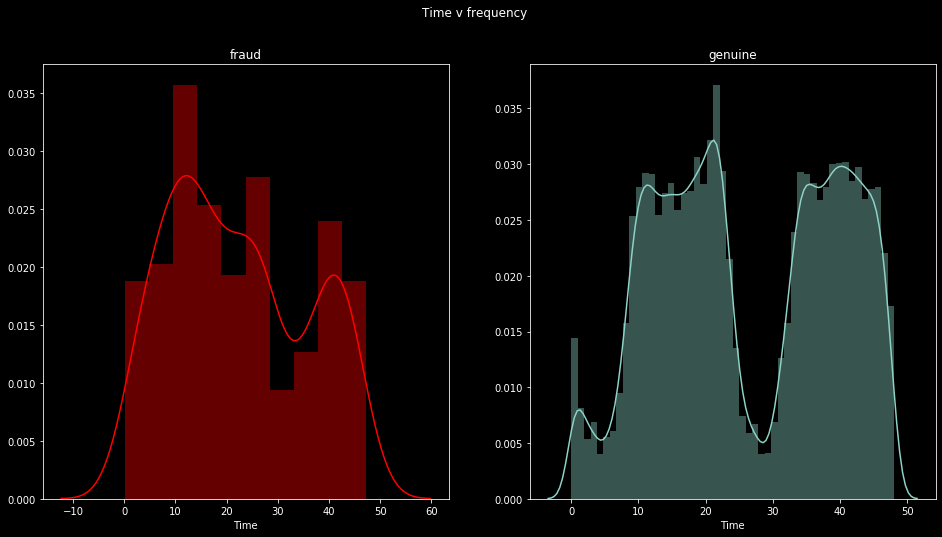

In [32]:
fig, axs=plt.subplots(1,2,figsize=(16,8))

sns.distplot(df[df['Class']==1]['Time'],ax=axs[0],color='r',bins=10)
axs[0].set_title("fraud")
sns.distplot(df[df['Class']==0]['Time'],ax=axs[1])
axs[1].set_title("genuine")
fig.suptitle("Time v frequency")

(0, 25)

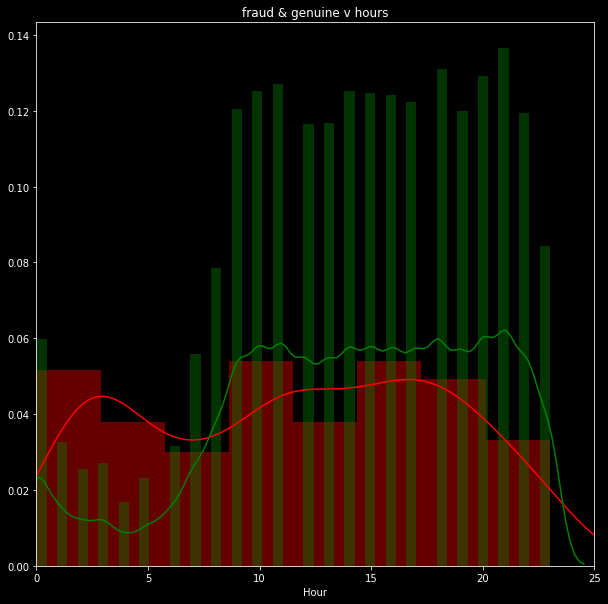

In [33]:
fig,axs=plt.subplots(figsize=(10,10))
sns.distplot(df[df['Class']==1]['Hour'],color='r')
sns.distplot(df[df['Class']==0]['Hour'],color='g')
plt.title('fraud & genuine v hours')
plt.xlim(0,25)

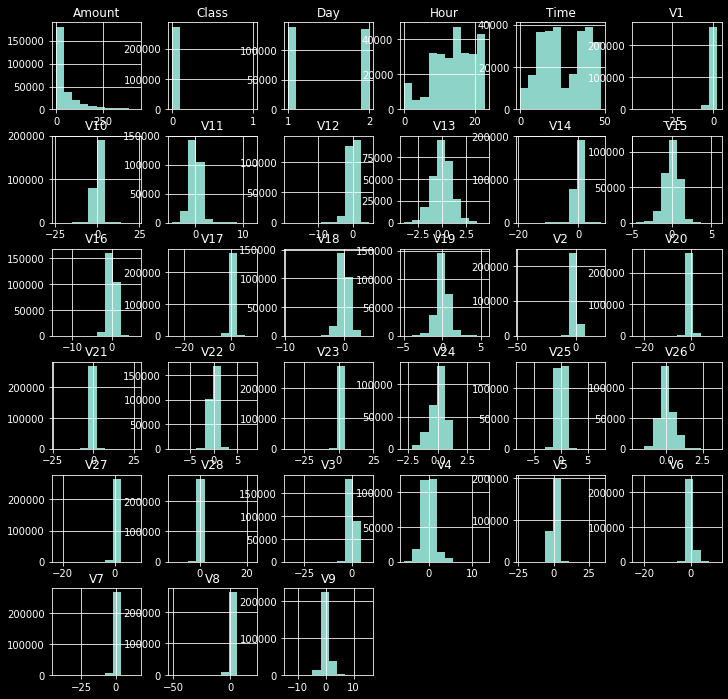

In [34]:
df.hist(figsize = (12,12))
plt.show()

In [35]:
#checking vlaues according to different scales

df['amount_log'] = np.log(df.Amount+0.01)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['amount_scaled']=ss.fit_transform((df['Amount']).values.reshape(-1,1))
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df['amount_minmax']=mm.fit_transform((df['Amount']).values.reshape(-1,1))

Text(0.5, 1.0, 'Class vs Min Max Amount')

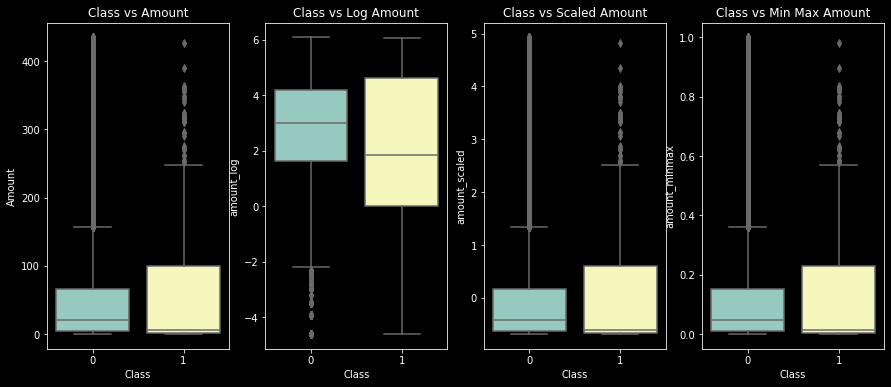

In [36]:
#boxplots for different scales, choosing log amount as the scaler
fig, axs=plt.subplots(1,4,figsize=(15,6))
sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")


In [37]:
import pickle
CreditCardFraudDataCleaned = df

with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)

    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: C:\Users\Aakash
